In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
# Load filename from JSON file
temp_filename = 'temp_filename.json'

if os.path.exists(temp_filename):
    with open(temp_filename, 'r') as f:
        data = json.load(f)
    filename = data.get('filename', '')

    if filename:
        eeg_file_path = os.path.join(r'C:\Users\phili\EEG_project\EEG_proj_data\ucsd-neural-data-challenge\data\train', filename)
        event_file_path = os.path.join(r'C:\Users\phili\EEG_project\EEG_proj_data\ucsd-neural-data-challenge\data\y_train_only', filename)
        eeg_df = pd.read_csv(eeg_file_path)
        event_df=pd.read_csv(event_file_path)

    else:
     print(f"{temp_filename} does not exist.")


In [4]:
display(eeg_df.info())
display(event_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604803 entries, 0 to 604802
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        604803 non-null  int64  
 1   C3          604803 non-null  float64
 2   Cz          604803 non-null  float64
 3   C4          604803 non-null  float64
 4   EOG:ch01    604803 non-null  float64
 5   EOG:ch02    604803 non-null  float64
 6   EOG:ch03    604803 non-null  float64
 7   EventStart  604803 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 36.9 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   EventType  120 non-null    int64
dtypes: int64(1)
memory usage: 1.1 KB


None

In [5]:
display(eeg_df.head())
display(event_df.head())

,time,C3,Cz,C4,EOG:ch01,EOG:ch02,EOG:ch03,EventStart
0,0,4.150454,0.192264,0.225834,-20.263981,18.738079,-5.889982,0
1,4,4.446479,1.913481,4.299992,-6.561379,41.260395,12.726024,0
2,8,2.200351,3.363088,2.221714,-13.031205,53.864347,20.080873,0
3,12,0.186160,1.181048,-0.872816,-37.079423,28.839551,6.775006,0
4,16,3.909361,3.921569,5.008011,-3.692683,67.566949,45.563439,0


,EventType
0,0
1,1
2,0
3,1
4,1


In [14]:
display(eeg_df.describe())
display(event_df.describe())

Descriptive Statistics:


,time,C3,Cz,C4,EOG:ch01,EOG:ch02,EOG:ch03,EventStart
count,4.663140e+05,466314.000000,466314.000000,466314.000000,466314.000000,466314.000000,466314.000000,466314.000000
mean,9.326260e+05,0.114598,0.113158,0.112187,2.188828,2.134318,2.220482,0.000343
std,5.384536e+05,4.317762,3.500132,4.198466,37.067675,61.598904,43.264639,0.018520
min,0.000000e+00,-50.012210,-50.012210,-50.012210,-1000.244200,-1000.244200,-1000.244200,0.000000
25%,4.663130e+05,-2.075702,-1.880342,-1.929182,-4.395604,-9.279609,-6.349206,0.000000
50%,9.326260e+05,0.097680,0.146520,0.097680,2.930403,2.930403,2.930403,0.000000
75%,1.398939e+06,2.222222,2.173382,2.075702,10.256410,13.675214,11.721612,0.000000
max,1.865252e+06,38.461538,23.565324,37.997558,361.904762,759.462759,494.261294,1.000000


In [7]:
fs = 250  

eeg_channel = ['C3', 'Cz', 'C4']
eog_channel = ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
all_channel = eeg_channel+ eog_channel

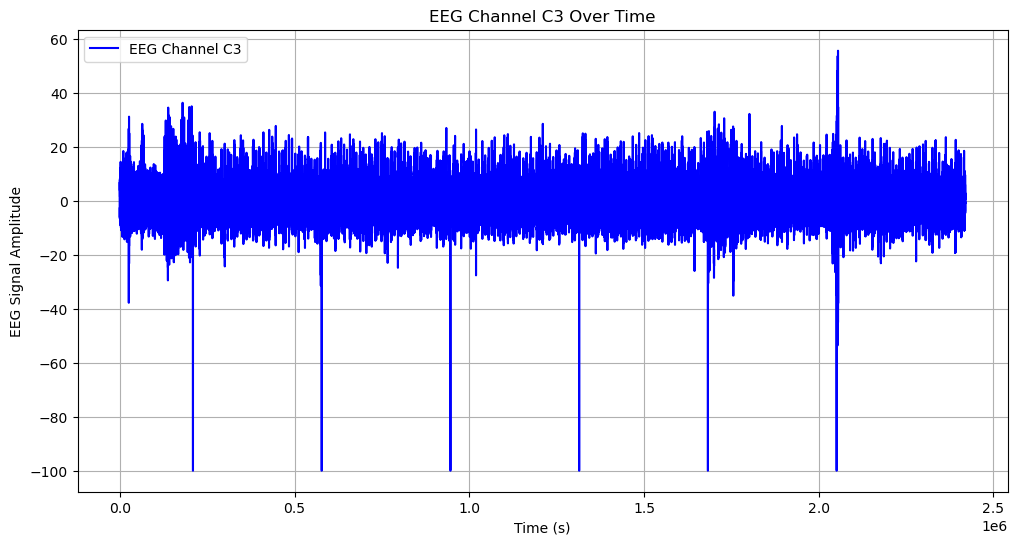

In [9]:
time = eeg_df['time'].values

plt.figure(figsize=(12, 6))
plt.plot(time, eeg_df['C3'].values, label='EEG Channel C3', color='b')
plt.xlabel('Time (s)')
plt.ylabel('EEG Signal Amplitude')
plt.title('EEG Channel C3 Over Time')
plt.legend()
plt.grid(True)
plt.show()

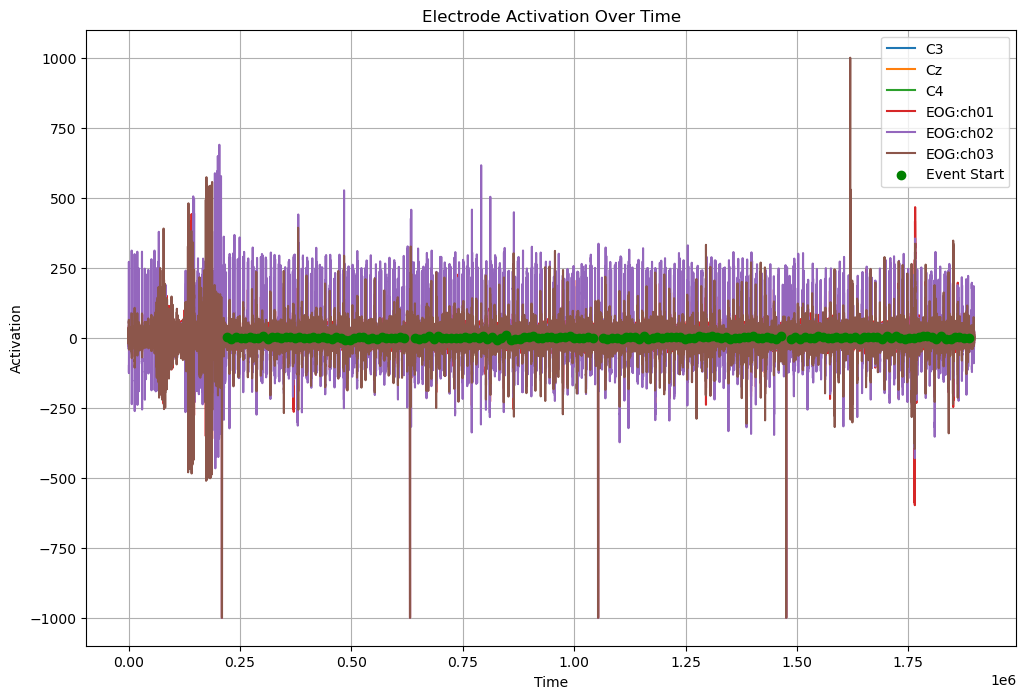

In [23]:
#epoching data et preprocessing cleaning data en utilisant mne pour ensuite faire spectrogramme
#